<a href="https://colab.research.google.com/github/KrishnenduRaj-alt/Clustering/blob/main/Assignment_KNN_Zoo_krishnedu_Raj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implement a KNN model to classify the animals in to categories


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier#
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Read and Preprocess the data

In [ ]:
data=pd.read_csv("/content/Zoo.csv")

In [ ]:
data.head(5)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
data.shape

(101, 18)

In [ ]:
data.type.value_counts()  #unbalanced

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [ ]:
data.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [ ]:
Data=data.drop(columns=["animal name"])
Data

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


<Axes: >

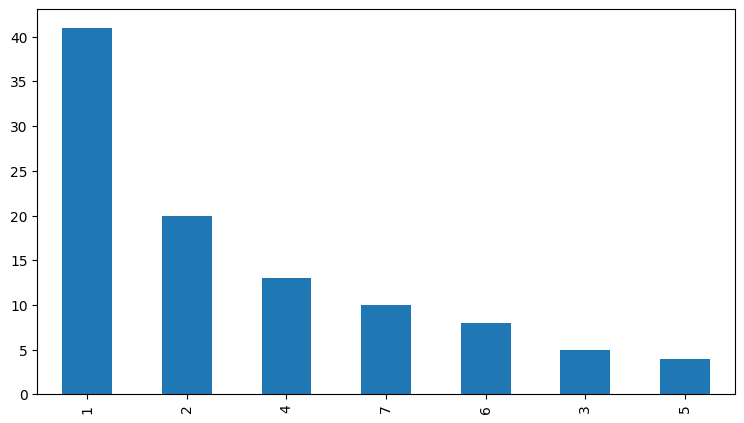

In [ ]:
plt.figure(figsize=(9,5))
Data.type.value_counts().plot(kind="bar")  #target variable is multiclass

In [ ]:
#plt.figure(figsize=(9,5))
#Data.legs.value_counts().plot(kind="bar")

In [ ]:
x=Data.iloc[:,:16]
y=Data.iloc[:,16]

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x)
x_test_scaled = scaler.transform(x)

In [ ]:
x_train_scaled

array([[ 1.16139451, -0.49690399, -1.18522652, ..., -1.69841555,
        -0.38435306,  1.13818037],
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
        -0.38435306, -0.87859537],
       [-0.86103386,  2.01246118,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537]])

In [ ]:
x_train_scaled,y_train,x_test_scaled,y_test=train_test_split(x,y,test_size=0.2,random_state=15)

In [ ]:
x_train_scaled.shape

(80, 16)

In [ ]:
x_test_scaled.shape

(80,)

#MODEL

In [ ]:
model=KNeighborsClassifier(n_neighbors=4)
model.fit(x_train_scaled,x_test_scaled)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
pred=model.predict(y_train)

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         8
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         5
           5       0.50      0.50      0.50         2
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         2

    accuracy                           0.86        21
   macro avg       0.50      0.50      0.50        21
weighted avg       0.86      0.86      0.86        21



In [ ]:
f1 = f1_score(y_test,pred, average='weighted')

In [ ]:
f1   #highest value for f1

0.8571428571428571

In [ ]:
#f1score

r=[]
for k in range(1,40,2):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train_scaled, x_test_scaled)
    pred=model.predict(y_train)
    r.append(f1_score(y_test,pred, average='weighted'))

In [ ]:
r

[0.9682539682539681,
 0.9492063492063492,
 0.8571428571428571,
 0.7714285714285714,
 0.7714285714285714,
 0.7714285714285714,
 0.7575757575757576,
 0.7575757575757576,
 0.7575757575757576,
 0.7575757575757576,
 0.7575757575757576,
 0.7575757575757576,
 0.746031746031746,
 0.6441798941798942,
 0.417233560090703,
 0.38388278388278385,
 0.38388278388278385,
 0.23249299719887956,
 0.18624338624338627,
 0.18624338624338627]

Text(0.5, 1.0, 'K-value VS f1-score')

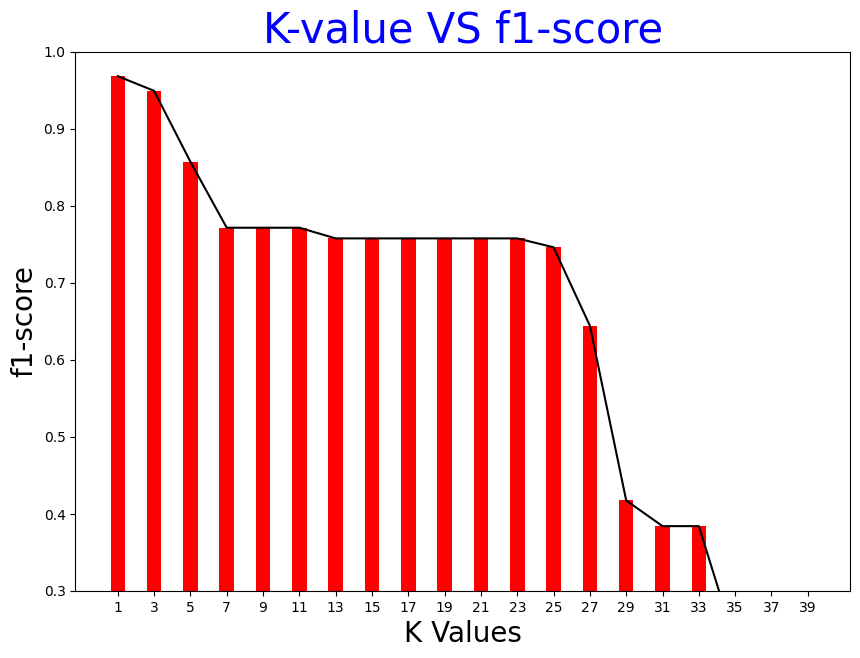

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(range(1,40,2),r,color='red')
plt.plot(range(1,40,2),r,color='black')
plt.ylim(0.3,1)
plt.xticks(range(1,40,2))
plt.xlabel("K Values",size=20)
plt.ylabel("f1-score",size=20)
plt.title("K-value VS f1-score",color='blue',size=30)